### This script contains the following points:
1. Import libraries
2. Loading and Checking Data
3. Preprocess the Data
4. Create a Line Chart of the Data
5. Decompose the Data's Components
6. Conduct a Dickey-Fuller Test to check for Stationarity
7. Differencing the Data if Not Stationary
8. Check the Data's Autocorrelations
9ext Steps

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('fivethirtyeight')

In [3]:
# Creating a folder path
path = r'C:\Users\Lenovo\Desktop\Career Foundry\Achievement 6'

### 2. Importing and checking Data

In [5]:
#Using the os.path.function to import the cleaned file
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid_clean_new2.csv'), index_col = False)

In [7]:
df.shape

(475065, 8)

In [11]:
# No one will understand scientific numbers. Changing the display setting:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,475065.00,475065.00,475065.00,475065.00
mean,2021.40,6.20,9.47,10.25
std,1.08,3.35,49.84,52.89
min,2020.00,1.00,0.00,0.00
25%,2020.00,3.00,0.00,0.00
50%,2021.00,6.00,0.00,0.00
75%,2022.00,9.00,6.00,6.00
max,2023.00,12.00,5094.00,5094.00


In [15]:
df.head(10)

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,2020.00,1.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
1,2020.00,2.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
2,2020.00,3.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
3,2020.00,4.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
4,2020.00,5.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
5,2020.00,6.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
6,2020.00,7.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
7,2020.00,8.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00
8,2020.00,9.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,7.00,9.00
9,2020.00,10.00,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,0.00,0.00


In [17]:
warnings.filterwarnings("ignore")

### 3. Preprocessing the data

#### Convert the "Year" and "Month" columns to integer types and then creating a new "Date" column..

#### This new column will be used to aggregate the data by month, summing the "Number of Mentions" and "COVID-19 Deaths"

In [19]:
# Preprocessing with 'Year' and 'Month' as the time variables
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [23]:
# Check the changes
df[['Year', 'Month', 'Date']].head(10)

,Year,Month,Date
0,2020,1,2020-01-01
1,2020,2,2020-02-01
2,2020,3,2020-03-01
3,2020,4,2020-04-01
4,2020,5,2020-05-01
5,2020,6,2020-06-01
6,2020,7,2020-07-01
7,2020,8,2020-08-01
8,2020,9,2020-09-01
9,2020,10,2020-10-01


In [25]:
# Aggregate data by month and sum the number of mentions and COVID-19 deaths
monthly_data = df.groupby(['Date']).agg({'Number of Mentions': 'sum', 'COVID-19 Deaths': 'sum'}).reset_index()

In [29]:
# Check the aggregation
monthly_data.head(10)

,Date,Number of Mentions,COVID-19 Deaths
0,2020-01-01,108.00,106.00
1,2020-02-01,318.00,358.00
2,2020-03-01,23703.00,22849.00
3,2020-04-01,194504.00,185148.00
4,2020-05-01,141801.00,133337.00
5,2020-06-01,74910.00,70213.00
6,2020-07-01,130308.00,123116.00
7,2020-08-01,127670.00,119529.00
8,2020-09-01,83117.00,77310.00
9,2020-10-01,106288.00,98607.00


### 4. Create a Line Chart of the Data

#### Create a line chart to visualize the monthly trends in the "Number of Mentions" of conditions and "COVID-19 Deaths".

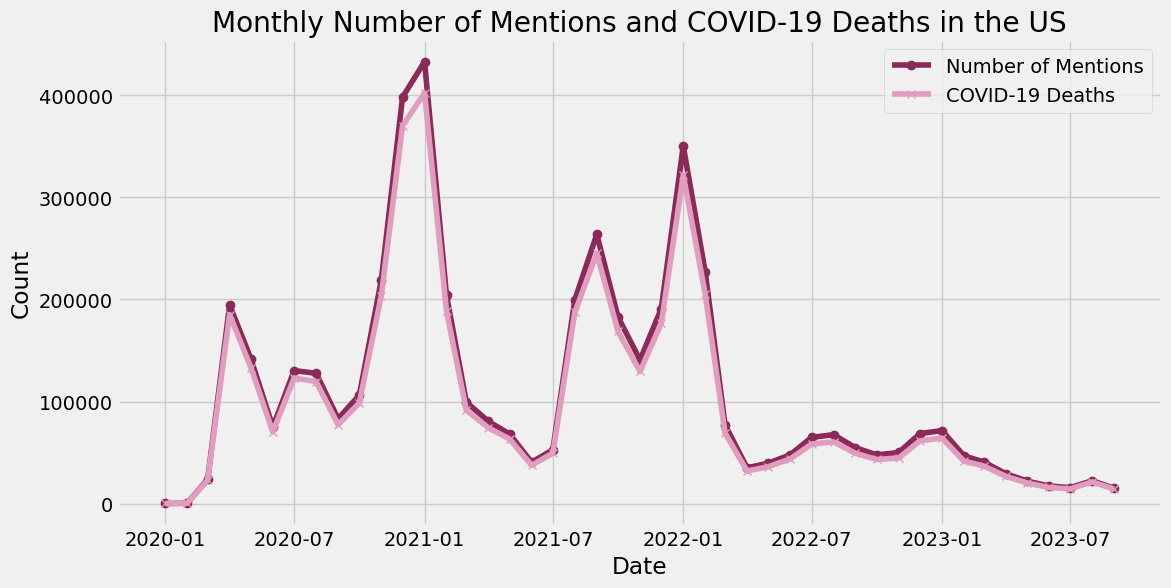

In [31]:
# Plot the line chart for "Number of Mentions" and "COVID-19 Deaths"
plt.figure(figsize=(12,6))
plt.plot(monthly_data['Date'], monthly_data['Number of Mentions'], marker = 'o', label = 'Number of Mentions', color = '#892a58')
plt.plot(monthly_data['Date'], monthly_data['COVID-19 Deaths'], marker = 'x', label = 'COVID-19 Deaths', color = '#e19dbe')
plt.title('Monthly Number of Mentions and COVID-19 Deaths in the US')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'monthly_death.png')
plt.savefig(file_name)
plt.show()

#### Insight: The line chart shows significant fluctuations in the number of mentions and COVID-19 deaths over time, with notable peaks around winter months.

### 5. Decompose the Data's Components

#### The time-series data will now be decomposed into its three main components: Trend, Seasonality, and Residuals.

#### The decomposition is performed for both "Number of Mentions" and "COVID-19 Deaths".

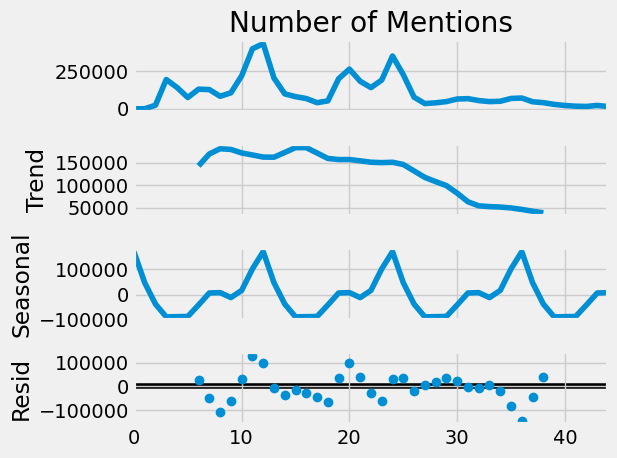

In [33]:
# Decompose the data's components for Number of Mentions
result_mentions = seasonal_decompose(monthly_data['Number of Mentions'], model = 'additive', period =12)
result_mentions.plot()

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'number_of_mentions.png')
plt.savefig(file_name)
plt.show()

#### The decomposition of the "Number of Mentions" shows a clear trend, indicating an increase followed by a decrease over time. The seasonal component shows periodic fluctuations, as expected from the line chart. The residuals appear to be relatively random, indicating that most patterns in the data are captured by the trend and seasonality.

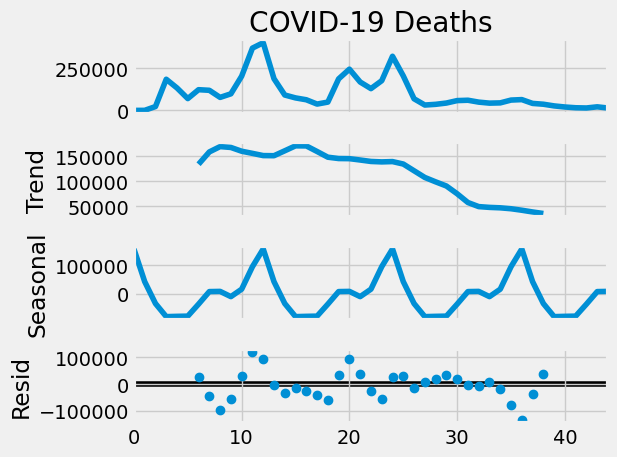

In [65]:
# Decompose the data's components for COVID-19 Deaths
result_deaths = seasonal_decompose(monthly_data['COVID-19 Deaths'], model = 'additive', period = 12)
result_deaths.plot()

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'covid_19_death.png')
plt.savefig(file_name)
plt.show()

#### The decomposition of the "COVID-19 Deaths" series shows a similar pattern to the "Number of Mentions". There is a clear trend and seasonal component, with residuals appearing to be more or less random.

### 6. Conduct a Dickey-Fuller Test to check for Stationarity

#### Perform the Dicky-Fuller test to check if the time series data for "Number of Mentions" and "COVID-19 Deaths" are stationary.

In [37]:
# Function to perform the Dicky-Fuller test
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        return False
    else:
        return True

In [39]:
# Check stationarity for both series
stationary_mentions = check_stationarity(monthly_data['Number of Mentions'])
stationary_deaths = check_stationarity(monthly_data['COVID-19 Deaths'])

ADF Statistic: -2.3173205807198602
p-value: 0.16644257421418018
ADF Statistic: -2.3149730083416182
p-value: 0.1671843422723192


#### The results for both "Number of Mentions" and "COVID-19 Deaths" shows p-values greater than 0.05 (0.1664 and 0.1671, respectively). This indicates that we fail to reject the null hypothesis of non-stationarity.


#### The data is not stationary and requires differencing to stabilize the mean.

### 7. Differencing the Data if Not Stationary

#### Apply differencing to the time series data for "Number of Mentions" and "COVID-19 Deaths" to make them stationary.

In [41]:
# Differencing the data for Number of Mentions if not stationary
if not stationary_mentions:
    monthly_data['Number of Mentions Diff'] = monthly_data['Number of Mentions'].diff().dropna()
    stationary_mentions = check_stationarity(monthly_data['Number of Mentions Diff'].dropna())

ADF Statistic: -3.6357850156950606
p-value: 0.005112616670826317


In [43]:
# Differencing the data for COVID_19 Deaths if not stationary
if not stationary_deaths:
    monthly_data['COVID-19 Deaths Diff'] = monthly_data['COVID-19 Deaths'].diff().dropna()
    stationary_mentions = check_stationarity(monthly_data['COVID-19 Deaths Diff'].dropna())

ADF Statistic: -3.6538001422412676
p-value: 0.004811974375572937


#### After applying differencing, the Dicky-Fuller test results show significant improvements:

1. For "Number of Mentions", the ADF Statistic is -3.6357 with a p-value of 0.0051.
2. For "COVID-19 Deaths", the ADF Statistic is -3.6538 with a p-value of 0.0048.

#### Both p-values are now less than 0.05, allowing us to reject the null hypothesis of non-stationarity.

#### The differenced data is now stationary and suitable for time-series modelling.

### 8. Check the Data's Autocorrelations

#### Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the differenced series of "Number of Mentions" and "Covid-19 Deaths"..

#### Identify the appropriate initial parameters (p, d, q) for the ARIMA model by showing how the data points are correlated with their past values.

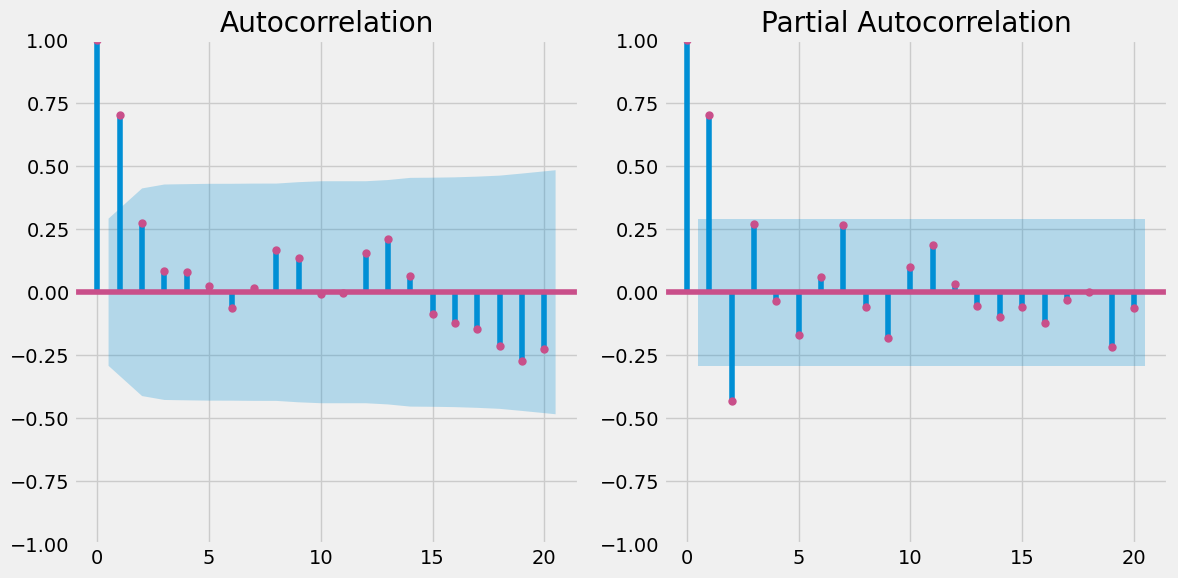

In [45]:
# Plot ACF and PACF for Number of Mentions
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(monthly_data['Number of Mentions'].dropna(), lags = 20, ax = plt.gca(), color = '#c94f8a')
plt.title('Autocorrelation')
plt.subplot(122)
plot_pacf(monthly_data['Number of Mentions'].dropna(), lags = 20, ax = plt.gca(), color = '#c94f8a')
plt.title('Partial Autocorrelation')
plt.tight_layout()

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'acf_arima_model.png')
plt.savefig(file_name)
plt.show()

#### The ACF and PACF plots for "Numbe of Mentions" indicate significant autocorrelations at lag 1, suggesting an ARIMA model with parameters (p, d, q) = (1, 1, 1) might be appropiate.

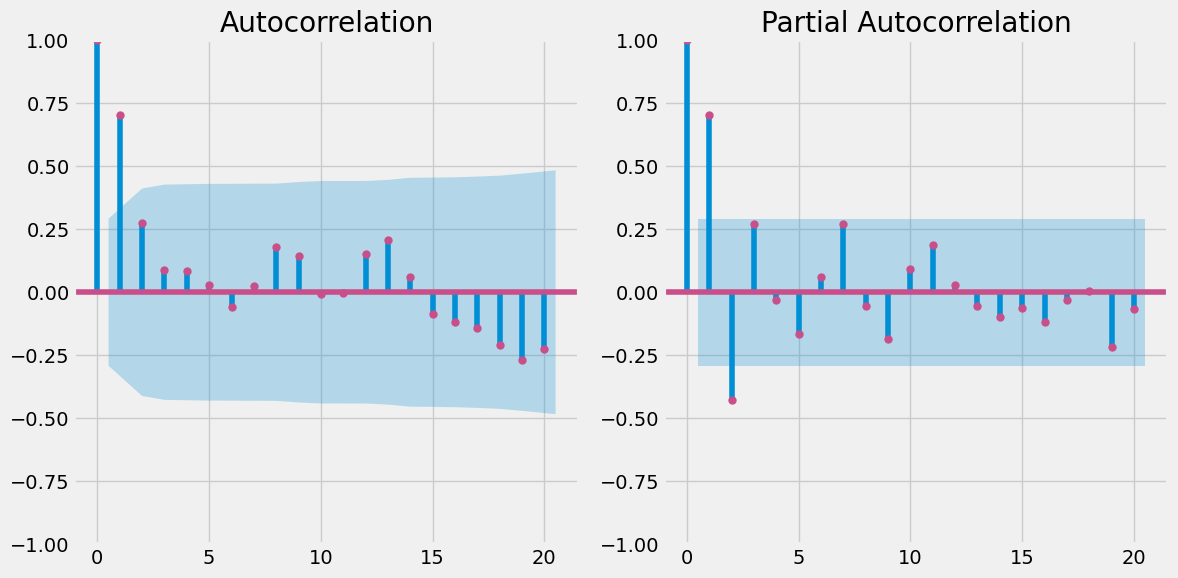

In [47]:
# Plot ACF and PACF for COVID-19 Deaths
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(monthly_data['COVID-19 Deaths'].dropna(), lags = 20, ax = plt.gca(), color = '#c94f8a')
plt.title('Autocorrelation')
plt.subplot(122)
plot_pacf(monthly_data['COVID-19 Deaths'].dropna(), lags = 20, ax = plt.gca(), color = '#c94f8a')
plt.title('Partial Autocorrelation')
plt.tight_layout()

# Export to the 'Visualizations' folder
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'pacf_arima_model.png')
plt.savefig(file_name)
plt.show()

#### The ACF and PACF plots for "COVID- 19 Deaths" also show significant autocorrelations at lag 1. This suggests that an ARIMA model with parameters (p,d, q) = (1, 1, 1) could also be suitable for modeling "COVID-19 Deaths".

### 9. Summary

1. Data Preprocessing: "Year" and "Month" columns were converted to integer and a new " Date" column was created. The data was then aggregated by month to facilitate time series analysis.
2. Visualization: Line charts were plotted to visualize the monthly trends in the "Number of Mentions" and "Covid-19 Deaths". This helped identify patterns and significant fluctuations over time.
3. Decomposition: The time series data was decomposed into its trend, seasonality, and residual components. This allows us to understand the underlying patterns in the data.
4. Stationarity Check: The Dickey-Fuller test was performed to check for stationarity. The test indicated that the original series were not stationary, so differencing was applied to stabilize the mean.
5. Autocorrelation Analysis: ACF and PCAF plots were created for the differenced series. These plots indicated significant autocorrelations at lag 1 for both "Number of Mentions" and "COVID-19 Deaths".